# Multinomial Logistic Regression

In this script we use multinomial logistic regression to predict the handwritten digits of the MNIST dataset.

sys.version_info(major=3, minor=6, micro=3, releaselevel='final', serial=0)
1.1.0
(4000, 1, 28, 28) (4000,) 28


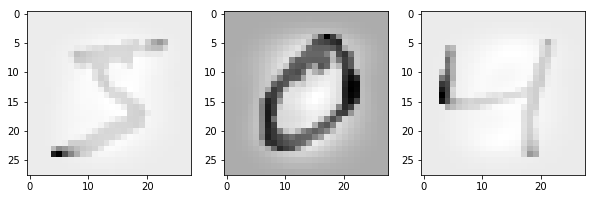

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as imgplot
import numpy as np

# To be compatible with python3
try:
    import cPickle as pickle
except ImportError:
    import pickle

import gzip
import time
import tensorflow as tf
import sys

print(sys.version_info)
print(tf.__version__)

with gzip.open('../data/mnist_4000.pkl.gz', 'rb') as f:
    (X,y) = pickle.load(f, encoding='latin1')
PIXELS = len(X[0,0,0,:])
print(X.shape, y.shape, PIXELS) #As read
fig = plt.figure(figsize=(10,30))
for i in range(3):
    a=fig.add_subplot(1,3,(i+1))
    plt.imshow(X[i,0,:,:], interpolation='none',cmap=plt.get_cmap('gray'))

In [2]:
# We need to reshape for the logistic regression
X = X.reshape([4000, 784])
np.shape(X)

(4000, 784)

In [3]:
# Taken from http://stackoverflow.com/questions/29831489/numpy-1-hot-array
def convertToOneHot(vector, num_classes=None):
    result = np.zeros((len(vector), num_classes), dtype='float32')
    result[np.arange(len(vector)), vector] = 1
    return result
print("class label")
print(y[0:5])
print("class label in OneHot encodig")
print(convertToOneHot(y[0:5], 10))

class label
[5 0 4 1 9]
class label in OneHot encodig
[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]


### Construction of the graph

In [4]:
tf.reset_default_graph()
tf.set_random_seed(1)
#Note that we usually do not like to specify the batchsize. Choosing it `None` will leave it open
x = tf.placeholder(tf.float32, shape=[None, 784], name='x_data')
y_true = tf.placeholder(tf.float32, shape=[None, 10], name='y_data')

# We start with random weights a
w = tf.Variable(tf.random_normal([784, 10], stddev=0.01))
b = tf.Variable(tf.zeros([10]))

#<-------------------------- Your code here ---------------
# Your code here, do a matrix multiplication between x,w and an addtion of b
z = tf.matmul(x,w)+b
# End of your code

prob = tf.nn.softmax(z)
init_op = tf.global_variables_initializer() 

### Store the graph and visualize it in tensorboard

In [5]:
tf.summary.FileWriter("tmp/Multinomial_Logistic_Regression/", tf.get_default_graph())#<--- Where to store

### Doing a forward pass of the untrained network

In [6]:
with tf.Session() as sess:
    sess.run(init_op)
    res_val = sess.run(prob, feed_dict={x:X[0:10]})
print("true label = ",y[0])
print()
print("probability for each class = ",res_val[0])
print()
print("pred label = ",np.argmax(res_val[0]))

true label =  5

probability for each class =  [ 0.11525529  0.13671385  0.08958027  0.07389172  0.11342652  0.10523579
  0.10331967  0.07971239  0.07903792  0.1038266 ]

pred label =  1


### Train the model

In [7]:
loss = tf.reduce_mean(-tf.reduce_sum(y_true * tf.log(prob), reduction_indices=[1]))

#train_op = tf.train.GradientDescentOptimizer(0.01).minimize(loss)
train_op = tf.train.AdagradOptimizer(0.1).minimize(loss)
init_op = tf.global_variables_initializer() 
with tf.Session() as sess:
    sess.run(init_op)
    for i in range(1000):
        idx = np.random.permutation(2400)[0:128] #Easy minibatch of size 128
        #res, out_val, _ = sess.run((loss, prob, train_op),feed_dict={x:X[idx], y_true:convertToOneHot(y[idx], 10)})
        loss_, out_val, _ = sess.run((loss, prob, train_op),feed_dict={x:X[idx], y_true:convertToOneHot(y[idx], 10)})
        if (i % 100 == 0):
            print(loss_)
    
    # Get the loss for the validation results (from 2400:3000)
    print('Loss for the validation set')
    #<-------------------------- Your code here ---------------
    loss_val = sess.run((loss), feed_dict={x:X[2400:3000], y_true:convertToOneHot(y[2400:3000], 10)})
    print(loss_val)
    # Get the results for the validation set
    res_val = sess.run((prob), feed_dict={x:X[2400:3000]})
    #<-------------------------  End of your code here --------

2.29376
0.115159
0.102442
0.0914249
0.0405277
0.0604342
0.0259042
0.0302623
0.0484401
0.0212244
Loss for the validation set
0.525234


In [8]:
# estimate the preformance on the validation set
# Your code here
print("Accuracy =",np.mean(np.argmax(res_val, axis = 1) == y[2400:3000]))
import random 
rmd=random.randint(2400,3000)
print("probs =",np.round(res_val[rmd-2400],2))
print("predicted label =",np.argmax(res_val[rmd-2400]))
print("true label =",np.round(y[rmd],2))

Accuracy = 0.885
probs = [ 0.54000002  0.          0.33000001  0.          0.          0.05        0.07
  0.01        0.          0.        ]
predicted label = 0
true label = 0
